In [1]:
import cohere
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

/home/admin-teias/Scorpian/Teias/self-explaination-thesis/.venv/lib/python3.12/site-packages/pydantic/_internal/_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)


# Snapfood dataset

In [14]:
snappfood = pd.read_csv('./datasets/sentiment analysis/snappfood/dev.csv', delimiter='\t', on_bad_lines='skip')

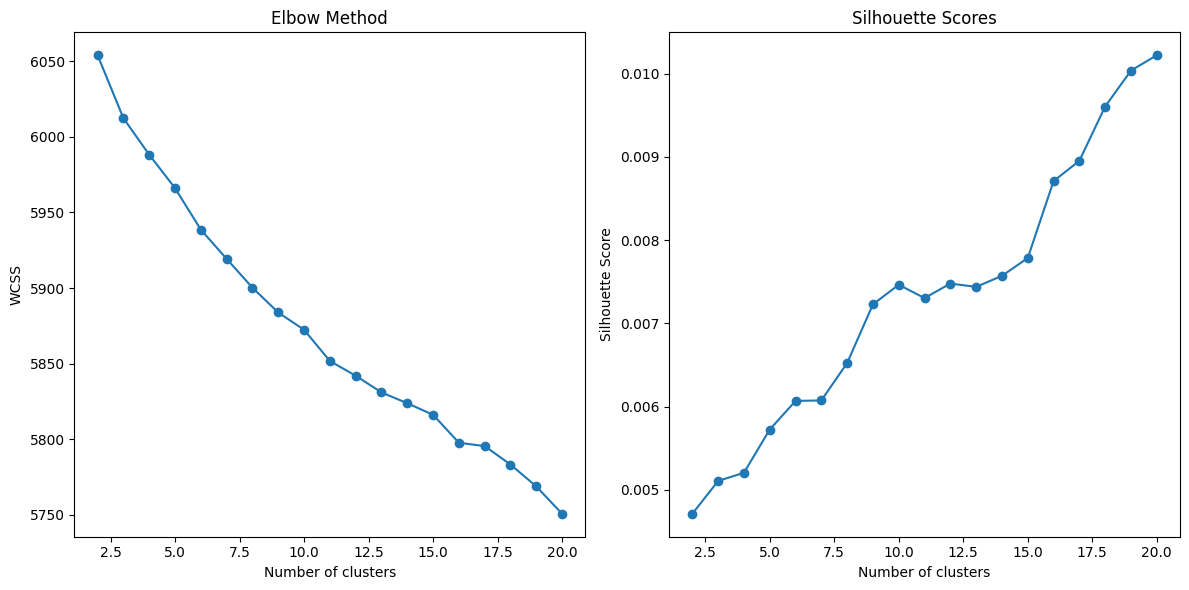

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocess comments
comments = snappfood['comment'].values

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)

# Elbow Method
wcss = []
silhouette_scores = []
cluster_range = range(2, 21)  # Test from 2 to 20 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Preprocess comments
comments = snappfood['comment'].values

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)

# Clustering using K-Means with 10 clusters
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
snappfood['cluster'] = kmeans.fit_predict(X)

# Sampling 2 comments from each cluster
sampled_comments = []
for cluster in range(num_clusters):
    cluster_samples = snappfood[snappfood['cluster'] == cluster]
    sampled_comments.append(cluster_samples.sample(n=2))  # Sample 2 comments from each cluster

# Combine sampled comments into a single DataFrame
sampled_df_snapfood = pd.concat(sampled_comments, ignore_index=True)

# Display the sampled comments
sampled_df_snapfood[['comment', 'label', 'label_id', 'cluster']]

,comment,label,label_id,cluster
0,بسته بندی تمیز کیفیت محصولات هم بسیار خوب. لطف...,HAPPY,0,0
1,سلام. خسته نباشید. واقعا خوشمزه و عالی بود. پی...,HAPPY,0,0
2,سیب زمینی با پنیر سفارش داده بودم و سیب زمینی ...,SAD,1,1
3,سلام واقعنی پیتزا سیب مثل قبل اصلن خوب نبود.. ...,SAD,1,1
4,خیلی سریع و داغ و لذیذ رسید,HAPPY,0,2
5,خرمالوها له و داغون به دستم رسید,SAD,1,2
6,بی نظیر عالی بود,HAPPY,0,3
7,عالی بود ممنونم فقط کاش سبزیجاتم موجود داشتید,HAPPY,0,3
8,دونات‌ها یخ کرده بود، من همیشه داغ داغ تحویل م...,HAPPY,0,4
9,غذا سرد بود کیفیت نداشت بنده ساعت ۱۱:۵۵ سفارش ...,SAD,1,4


# Digikala Data

In [17]:
digikala = pd.read_csv('./datasets/sentiment analysis/sentiment-analysis-digikala-master/data.csv')
digikala

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1
...,...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1


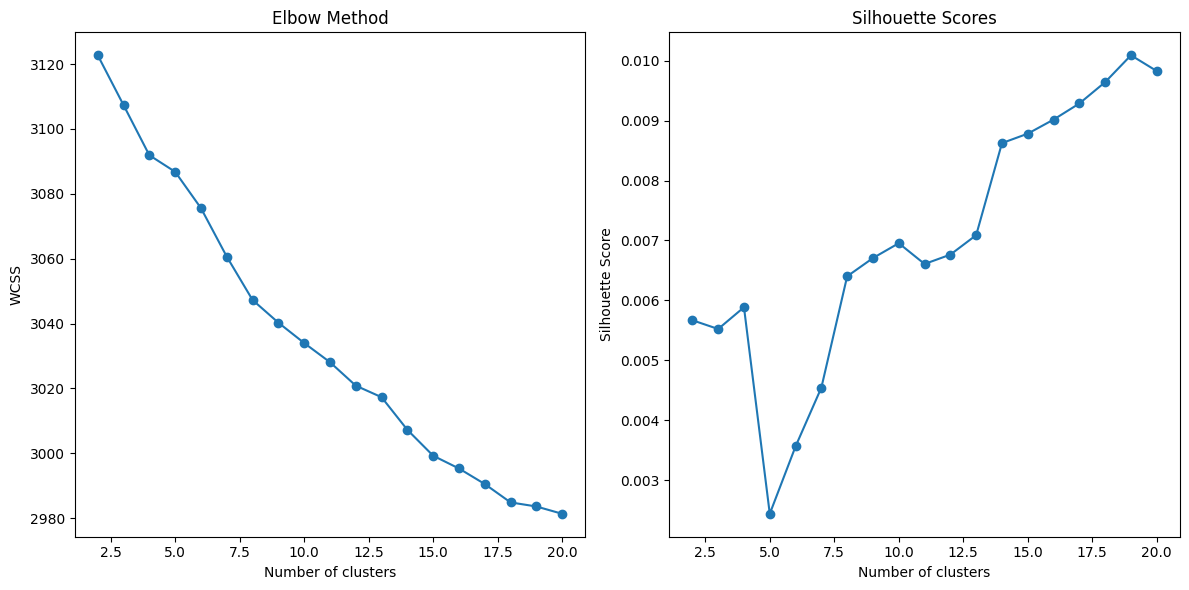

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocess the 'Text' column
texts = digikala['Text'].values

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
cluster_range = range(2, 21)  # Test from 2 to 20 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Preprocess the 'Text' column
texts = digikala['Text'].values

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Clustering using K-Means with 6 clusters
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
digikala['cluster'] = kmeans.fit_predict(X)

# Sampling 2 comments from each cluster
sampled_comments = []
for cluster in range(num_clusters):
    cluster_samples = digikala[digikala['cluster'] == cluster]
    sampled_comments.append(cluster_samples.sample(n=2, replace=True))  # Sample 2 comments from each cluster

# Combine sampled comments into a single DataFrame
sample_digikala = pd.concat(sampled_comments, ignore_index=True)

# Display the sampled comments
sample_digikala[['Text', 'Score', 'Suggestion', 'cluster']]


,Text,Score,Suggestion,cluster
0,چند روزه گرفتمش دارم استفاده میکنم خیلی عالیه...,88,1,0
1,بعد از کلی تحقیق خرید مش عالی اگر قیمتش مهم نی...,80,1,0
2,حدود یک ماهه این تلویزیون رو خریدم و از 10 نمر...,68,3,1
3,طراحی این محصول بسیار عالیست و مدل کیبورد شباه...,68,2,1
4,اولین بار نیست که از دیجی لوازم آرایش سفارش می...,80,2,2
5,دستگاه روز جمعه به دستم رسید ویندوز 10 نصب کرد...,76,1,2
6,قیمتش می تونست خیلی پایین تر باشه,88,1,3
7,دورببن خیلی خوبیه کیفیت نسبتا خوبی داره ولی تو...,68,1,3
8,کیفیت ساخت و زیبایی عالی,60,1,4
9,این محصول بسیار عالی و با کیفیت هست,100,1,4


1 -> +
2 -> -
3 -> =

In [12]:
sample_digikala['Text'][10]

'لپ تاپ بدی نیست یه ذره زاویه دید پایینی داره   جای اثر انگشت خیلی میمونه و کلیکهای تاچ پد خوب عمل نمیکنه  '

# Make new dataset with mapped_label

In [20]:
import pandas as pd

# Assuming sampled_df_snapfood and sample_digikala are your two sampled DataFrames

# Step 1: Map Snappfood labels to positive, negative, neutral
def map_snapfood_labels(label):
    if label == 'HAPPY':
        return 'positive'
    elif label == 'SAD':
        return 'negative'

# Apply the mapping
sampled_df_snapfood['mapped_label'] = sampled_df_snapfood['label'].apply(map_snapfood_labels)

# Step 2: Map Digikala labels to positive, negative, neutral
def map_digikala_labels(suggestion):
    if suggestion == 1:
        return 'positive'
    elif suggestion == 2:
        return 'negative'
    elif suggestion == 3:
        return 'neutral'

# Apply the mapping
sample_digikala['mapped_label'] = sample_digikala['Suggestion'].apply(map_digikala_labels)

# Step 3: Prepare the unified dataset

# Select relevant columns from both datasets
snapfood_comments = sampled_df_snapfood[['comment', 'mapped_label']].rename(columns={'comment': 'Text'})
digikala_comments = sample_digikala[['Text', 'mapped_label']]

# Concatenate both datasets
combined_df = pd.concat([snapfood_comments, digikala_comments], ignore_index=True)

# Display the new dataset
combined_df

,Text,mapped_label
0,بسته بندی تمیز کیفیت محصولات هم بسیار خوب. لطف...,positive
1,سلام. خسته نباشید. واقعا خوشمزه و عالی بود. پی...,positive
2,سیب زمینی با پنیر سفارش داده بودم و سیب زمینی ...,negative
3,سلام واقعنی پیتزا سیب مثل قبل اصلن خوب نبود.. ...,negative
4,خیلی سریع و داغ و لذیذ رسید,positive
5,خرمالوها له و داغون به دستم رسید,negative
6,بی نظیر عالی بود,positive
7,عالی بود ممنونم فقط کاش سبزیجاتم موجود داشتید,positive
8,دونات‌ها یخ کرده بود، من همیشه داغ داغ تحویل م...,positive
9,غذا سرد بود کیفیت نداشت بنده ساعت ۱۱:۵۵ سفارش ...,negative


In [23]:
for index, row in combined_df.iterrows():
    cm = row['Text']
    label = row['mapped_label']
    print(cm)
    print(label)
    print("*" * 40)

بسته بندی تمیز کیفیت محصولات هم بسیار خوب. لطفا در صورت امکان منو میوه تنوع بیشتری داشته باشد امروز چون موز تو منو نبود از سوپر میوه‌های دیگه اسنپ فود خرید کردم اصلا کیفیت مناسبی نداشت و واقعا تعهد و کیفیت سبزی من بسیار عالی و غیر قابل مقایسه است
positive
****************************************
سلام. خسته نباشید. واقعا خوشمزه و عالی بود. پیتزا مخلوط و هات داگ بسیار خوشمزه بود. ممنون از شیلا
positive
****************************************
سیب زمینی با پنیر سفارش داده بودم و سیب زمینی ساده ب من تحویل دادند! حداقل کار ممکن اینه که تفاوت قیمتش رو ب حسابم برگردونید
negative
****************************************
سلام واقعنی پیتزا سیب مثل قبل اصلن خوب نبود.. کیفیتش از دست داده حجم سیب زمینی ویژه با معمولی هیچ فرقی نداره.. فقط پنیر داره.. و درکل کلی پول پیک و مالیات زیاد میگیره
negative
****************************************
خیلی سریع و داغ و لذیذ رسید
positive
****************************************
خرمالوها له و داغون به دستم رسید
negative
****************************************
بی

In [24]:
combined_df.to_csv('sample_data.csv')

In [2]:
df = pd.read_csv('sample_data.csv')
df

,Unnamed: 0,Text,mapped_label
0,0,بسته بندی تمیز کیفیت محصولات هم بسیار خوب. لطف...,positive
1,1,سلام. خسته نباشید. واقعا خوشمزه و عالی بود. پی...,positive
2,2,سیب زمینی با پنیر سفارش داده بودم و سیب زمینی ...,negative
3,3,سلام واقعنی پیتزا سیب مثل قبل اصلن خوب نبود.. ...,negative
4,4,خیلی سریع و داغ و لذیذ رسید,positive
5,5,خرمالوها له و داغون به دستم رسید,negative
6,6,بی نظیر عالی بود,positive
7,7,عالی بود ممنونم فقط کاش سبزیجاتم موجود داشتید,positive
8,8,دونات‌ها یخ کرده بود، من همیشه داغ داغ تحویل م...,positive
9,9,غذا سرد بود کیفیت نداشت بنده ساعت ۱۱:۵۵ سفارش ...,negative


In [4]:
API_KEY = '47amNsxWIPexaTSxCmteAskkxXJ9XVfB2nClzP0j'

# Initialize Cohere client
co = cohere.Client(API_KEY)

# Define the sentiment analysis function
def get_sentiment(review):
    prompt = f"""
    Analyze the sentiment of the following review:
    "{review}"
    Assign one of the following labels: "positive", "negative", "neutral".
    Make sure to answer only with the label.
    """
    response = co.generate(
        model='command-xlarge-nightly',
        prompt=prompt,
        max_tokens=10,
        temperature=0.3
    )
    return response.generations[0].text.strip()

# Assuming combined_df is your DataFrame with comments
comments = df['Text'].tolist()
original_sentiments = df['mapped_label'].tolist()

# Analyze sentiment for each comment and store the results
sentiment_results = []
for comment, original_sentiment in zip(comments, original_sentiments):
    sentiment = get_sentiment(comment)
    sentiment_results.append(sentiment)
    print("Comment:", comment)
    print("Original Sentiment:", original_sentiment)
    print("Predicted Sentiment:", sentiment)
    print("-" * 40)  # Separator for clarity in output

Comment: بسته بندی تمیز کیفیت محصولات هم بسیار خوب. لطفا در صورت امکان منو میوه تنوع بیشتری داشته باشد امروز چون موز تو منو نبود از سوپر میوه‌های دیگه اسنپ فود خرید کردم اصلا کیفیت مناسبی نداشت و واقعا تعهد و کیفیت سبزی من بسیار عالی و غیر قابل مقایسه است
Original Sentiment: positive
Predicted Sentiment: positive
----------------------------------------
Comment: سلام. خسته نباشید. واقعا خوشمزه و عالی بود. پیتزا مخلوط و هات داگ بسیار خوشمزه بود. ممنون از شیلا
Original Sentiment: positive
Predicted Sentiment: positive
----------------------------------------
Comment: سیب زمینی با پنیر سفارش داده بودم و سیب زمینی ساده ب من تحویل دادند! حداقل کار ممکن اینه که تفاوت قیمتش رو ب حسابم برگردونید
Original Sentiment: negative
Predicted Sentiment: negative
----------------------------------------
Comment: سلام واقعنی پیتزا سیب مثل قبل اصلن خوب نبود.. کیفیتش از دست داده حجم سیب زمینی ویژه با معمولی هیچ فرقی نداره.. فقط پنیر داره.. و درکل کلی پول پیک و مالیات زیاد میگیره
Original Sentiment: negativ

In [5]:
# Add predicted sentiments to the DataFrame
df['cohere_sentiment'] = sentiment_results

# Compare original sentiment with predicted sentiment
comparison_df = df[['Text', 'mapped_label', 'cohere_sentiment']]
comparison_df['match'] = comparison_df['mapped_label'] == comparison_df['cohere_sentiment']

# Display the comparison DataFrame
comparison_df

,Text,mapped_label,cohere_sentiment,match
0,بسته بندی تمیز کیفیت محصولات هم بسیار خوب. لطف...,positive,positive,True
1,سلام. خسته نباشید. واقعا خوشمزه و عالی بود. پی...,positive,positive,True
2,سیب زمینی با پنیر سفارش داده بودم و سیب زمینی ...,negative,negative,True
3,سلام واقعنی پیتزا سیب مثل قبل اصلن خوب نبود.. ...,negative,negative,True
4,خیلی سریع و داغ و لذیذ رسید,positive,positive,True
5,خرمالوها له و داغون به دستم رسید,negative,negative,True
6,بی نظیر عالی بود,positive,positive,True
7,عالی بود ممنونم فقط کاش سبزیجاتم موجود داشتید,positive,positive,True
8,دونات‌ها یخ کرده بود، من همیشه داغ داغ تحویل م...,positive,negative,False
9,غذا سرد بود کیفیت نداشت بنده ساعت ۱۱:۵۵ سفارش ...,negative,negative,True


In [6]:
comparison_df.to_csv('compare_sentiment.csv')

# Check probability

In [11]:
API_KEY = '47amNsxWIPexaTSxCmteAskkxXJ9XVfB2nClzP0j'

# Initialize Cohere client
co = cohere.Client(API_KEY)

# Define the sentiment analysis function using `generate` with `return_likelihoods`
def get_sentiment_and_likelihoods(review):
    prompt = f"""
    Analyze the sentiment of the following review:
    "{review}"

    and explain why?
    """
    response = co.generate(
        model='command-xlarge-nightly',
        prompt=prompt,
        max_tokens=10,
        temperature=0.3,
        return_likelihoods='GENERATION'  # This will return likelihoods for the generated text
    )
    
    predicted_label = response.generations[0].text.strip()
    likelihoods = response.generations[0].likelihoods  # Access likelihoods
    
    # Calculate the average likelihood for the generated tokens
    if likelihoods:
        avg_likelihood = sum(likelihoods) / len(likelihoods)
    else:
        avg_likelihood = None
    
    return predicted_label, avg_likelihood

# Assuming combined_df is your DataFrame with comments
comments = df['Text'].tolist()
original_sentiments = df['mapped_label'].tolist()

# Analyze sentiment for each comment and store the results
sentiment_results = []
likelihood_results = []
for comment, original_sentiment in zip(comments, original_sentiments):
    predicted_label, avg_likelihood = get_sentiment_and_likelihoods(comment)
    sentiment_results.append(predicted_label)
    likelihood_results.append(avg_likelihood)
    print("Comment:", comment)
    print("Original Sentiment:", original_sentiment)
    print("Predicted Sentiment:", predicted_label)
    print("Average Likelihood:", avg_likelihood)
    print("-" * 40)  # Separator for clarity in output

KeyboardInterrupt: 

https://chatgpt.com/share/01d93cdc-186a-44dd-87e0-f5f920be837f

https://chatgpt.com/share/01d93cdc-186a-44dd-87e0-f5f920be837f

# Explain how to reach

In [3]:
API_KEY = '47amNsxWIPexaTSxCmteAskkxXJ9XVfB2nClzP0j'

# Initialize Cohere client
co = cohere.Client(API_KEY)

# Step 1: Read the CSV file
csv_file_path = 'sample_data.csv'
df = pd.read_csv(csv_file_path)

# Step 2: Sample 5 comments
sampled_df = df.sample(n=5, random_state=42)  # Randomly sample 5 rows

# Step 3: Define the function to get explanations in five different ways
def get_explanation_in_five_ways(review):
    prompt = f"""
    Analyze the sentiment of the following review:
    "{review}"
    Determine whether the sentiment is "positive", "negative", or "neutral".
    Explain how to reach this answer in the best way:
    1.
    """
    response = co.generate(
        model='command-xlarge-nightly',
        prompt=prompt,
        max_tokens=300,  # Increase max_tokens to allow for detailed responses
        temperature=0.5  # Adjust temperature to control creativity
    )
    
    return response.generations[0].text.strip()

# Step 4: Generate and print explanations for each sampled comment
for index, row in sampled_df.iterrows():
    comment = row['Text']
    explanation = get_explanation_in_five_ways(comment)
    print("Comment:", comment)
    print("Explanations:\n", explanation)
    print("-" * 40)  # Separator for clarity in output

Comment: این محصول بسیار عالی و با کیفیت هست  
Explanations:
 1. پاسخ: احساس این بررسی «مثبت» است.
    توضیح:

این بررسی حاوی کلماتی است که احساس مثبت را به وضوح نشان می‌دهند. عبارت «بسیار عالی و با کیفیت» نشان‌دهنده رضایت و نظر مثبت مشتری در مورد محصول است. این کلمات نشان می‌دهند که مشتری از خرید خود راضی است و محصول را با کیفیت بالا ارزیابی می‌کند. هیچ نشانه‌ای از نارضایتی یا انتقاد در این بررسی وجود ندارد، بنابراین احساس آن قطعاً مثبت است.
----------------------------------------
Comment: سلام و خسته نباشین خدمت شما ….. ببینید کیفیت غذاتون عالیه طعم‌ها بیست و بسته بندی عالی ولی متاسفانه توی دیزی اصلا گوشت پیدا نمیکنی همش نخوده و یک تیکه استخوان که به اندازه یک بند انگشت گوشت داره آخه حیفه برای رستوران شما
Explanations:
 Answer: negative

1. Although the review starts with a greeting and a positive note about the food quality, taste, and packaging, the overall sentiment quickly turns negative. The customer expresses disappointment and frustration with the lack of meat in the "dizi" (